## Reloading imports

In [48]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
%autoreload

In [50]:
from params import FuzzyInputVariable_List_Trapezoids
import numpy as np
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from optimizers.default import DefaultOptimizer
from optimizers.genetic import GeneticOptimizer, SmallestMaeErrorFitness, MultiPointCrossing, NRandomChangesMutation, RouletteWheelSelection, RankSelection

## Util functions

In [52]:
def generate_data(size, plot=False):
    x = np.arange(1, size, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))
    data_labels = np.round(dataX) * np.round(dataY)
    
    if plot:
        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')
        rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]
        ax.scatter(dataX, dataY, data_labels, c=rgb)
        plt.show()
    
    return dataXY, data_labels

In [55]:
def test_optimizer(optimizer, size=4):
    # prepare data
    dataXY, data_labels = generate_data(size)
    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

    # create anfis
    mf1 = [[0.5+i, 0.5, 0.5, 0.5] for i in range(size)]
    var_names = [str(i) for i in range(size)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", var_names)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", var_names)
    fis = ANFIS([varX, varY], X_train.T, y_train)

    # train
    start = time.time()
    fis.train(optimizer)
    elapsed_time = time.time() - start

    # evaluate on train data
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = np.round(y_pred.flatten())
    train_accuracy = accuracy_score(y_train, y_pred)
    fis.show_results()

    # evaluate on test data
    fis.training_data = X_test.T
    fis.expected_labels = y_test
    y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
    y_pred = np.round(y_pred.flatten())
    test_accuracy = accuracy_score(y_test, y_pred)

    # print result
    print(f'Train data accuracy: {train_accuracy:.2f}')
    print(f'Test data accuracy: {test_accuracy:.2f}')
    print(f'Training time: {elapsed_time:.2f}')

## Tests

Optimization finished after 288.30s


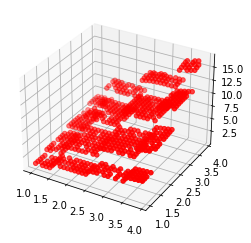

Train data accuracy: 0.98
Test data accuracy: 0.98
Training time: 288.30


In [59]:
optimizer = DefaultOptimizer(learn_operators=False)

test_optimizer(optimizer)

Optimizing 80 parameters


Evolution:  17%|█▋        | 8696/50000 [07:09<34:01, 20.23it/s]


Optimization finished after 429.94s


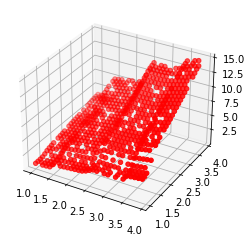

Train data accuracy: 0.54
Test data accuracy: 0.58
Training time: 429.94


In [56]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(3),
    NRandomChangesMutation(2),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=50_000,
    n_elite=2,
    patience=500,
    learn_operators=False
)

test_optimizer(optimizer)

Optimizing 80 parameters


Evolution:  15%|█▌        | 6188/40000 [05:04<27:43, 20.32it/s]

Optimization finished after 304.58s


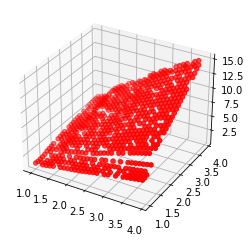

Train data accuracy: 0.46
Test data accuracy: 0.46
Training time: 304.58


In [64]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(4),
    NRandomChangesMutation(4),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=40_000,
    n_elite=2,
    patience=800,
    learn_operators=False
)

test_optimizer(optimizer)

C:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\exercises\anfis-genetic\ANFIS.py:90: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optimizing 80 parameters


Evolution:  36%|███▌      | 14394/40000 [11:57<21:17, 20.05it/s]

Optimization finished after 717.99s


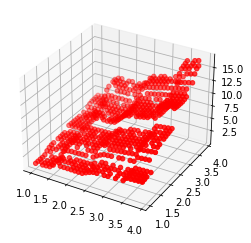

Train data accuracy: 0.75
Test data accuracy: 0.76
Training time: 717.99


In [65]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(4),
    NRandomChangesMutation(4),
    RankSelection(10),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=40_000,
    n_elite=4,
    patience=1000,
    learn_operators=False
)

test_optimizer(optimizer)

C:\Users\Lukasz\OneDrive - Politechnika Łódzka\siium\semestr-2\msi\labs\exercises\anfis-genetic\ANFIS.py:90: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


Optimizing 96 parameters


Evolution: 100%|██████████| 50000/50000 [42:31<00:00, 19.60it/s]

Optimization finished after 2551.59s


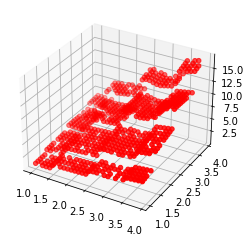

Train data accuracy: 0.91
Test data accuracy: 0.88
Training time: 2551.59


In [67]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(3),
    NRandomChangesMutation(2),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=100,
    n_generations=50_000,
    n_elite=2,
    patience=500,
    learn_operators=True
)

test_optimizer(optimizer)

Optimizing 192 parameters


Evolution:  20%|█▉        | 2948/15000 [12:13<49:57,  4.02it/s]  

Optimization finished after 733.38s


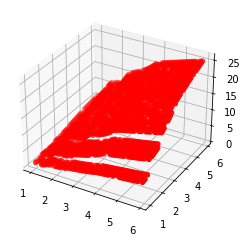

Train data accuracy: 0.40
Test data accuracy: 0.39
Training time: 733.38


In [73]:
optimizer = GeneticOptimizer(
    SmallestMaeErrorFitness(),
    MultiPointCrossing(3),
    NRandomChangesMutation(2),
    RouletteWheelSelection(),
    cross_prob=0.7,
    mutate_prob=0.1,
    n_chromosomes=80,
    n_generations=15_000,
    n_elite=2,
    patience=70,
    learn_operators=True
)

test_optimizer(optimizer, size=6)